In [5]:
%matplotlib nbagg
from astropy.io import fits
import source_extracting
import diff_image
from matplotlib import animation
import yt
import time
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.patches import Ellipse
import numpy as np
import matplotlib.animation as animation

In [6]:
file = "ELAISN1_MOS15-09_NUV.fits"
pngout = "../ELAISN1_MOS15-09_NUV"

In [7]:
diff_cube, bad_frame_mask, frame_wcs = diff_image.diff_image(file)
print diff_cube.shape
print bad_frame_mask
print diff_cube[~bad_frame_mask].shape

(45, 120, 71)
[ True False False False  True  True False False False False False False
 False False False False False False  True False  True False False False
 False False False False False False False False False False False False
  True False False False False False False False False]
(39, 120, 71)


<IPython.core.display.Javascript object>


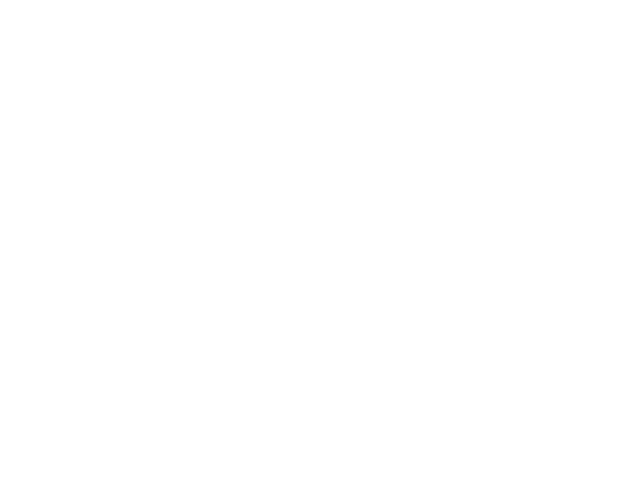

8
[ 16.5487552    8.38888187   1.23457444   0.91914392   0.38745341]
x, y, a, b, theta


In [8]:
unique_extracted_objects = source_extracting.find_all_objects(diff_cube[~bad_frame_mask], bad_frame_mask, frame_wcs, pngout, file)
print len(unique_extracted_objects)
print unique_extracted_objects[0]
print "x, y, a, b, theta"

0.0 69.0


<IPython.core.display.Javascript object>


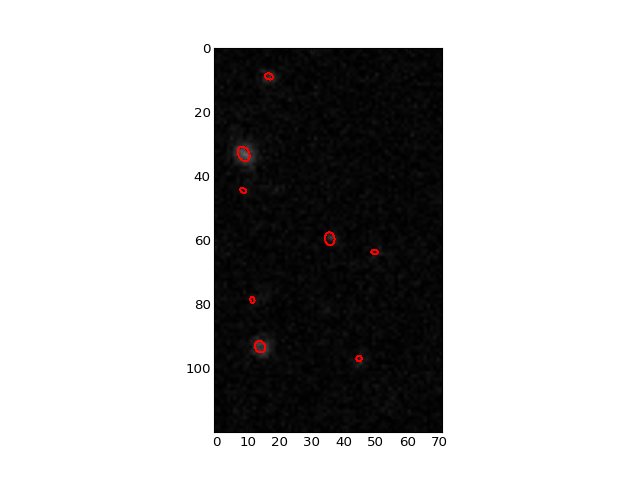

In [10]:
vmin, vmax = np.min(diff_cube), np.max(diff_cube)
print vmin, vmax

fig = plt.figure()

def f(i):
    return diff_cube[i,:,:]

ims = []
for i in range(diff_cube[~bad_frame_mask].shape[0]):
    im = plt.imshow(f(i), vmin=vmin, vmax=vmax, cmap=plt.get_cmap('gray'))
    for j in range(len(unique_extracted_objects)):
        ell = Ellipse((unique_extracted_objects[j][0],unique_extracted_objects[j][1]), 2.0*unique_extracted_objects[j][2], 2.0*unique_extracted_objects[j][3], angle=np.rad2deg(unique_extracted_objects[j][4]), fill=None, edgecolor='r')
        plt.gca().add_patch(ell)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
plt.show()